In [274]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploration des données

In [327]:
df = pd.read_csv("data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

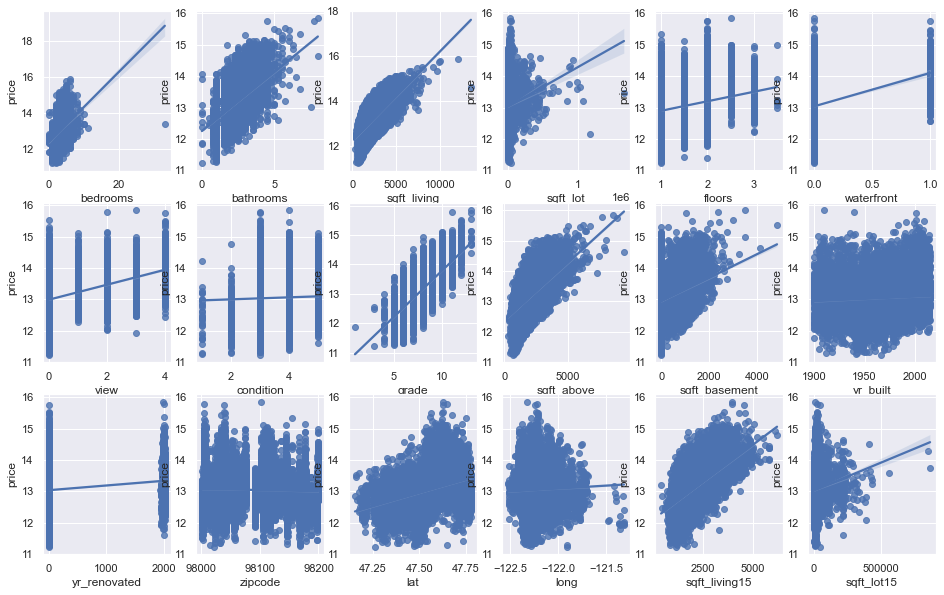

In [277]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront",
"view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
"zipcode","lat","long","sqft_living15","sqft_lot15"
]

fig, axes = plt.subplots(3, 6,figsize=(16,10))
for i in range(len(columns)):
    if i < 6:
        sns.regplot(ax=axes[0,i], x=df[columns[i]], y=np.log(df["price"]))
    elif i < 12:
        sns.regplot(ax=axes[1,i-6], x=df[columns[i]], y=np.log(df["price"]))
    else:
        sns.regplot(ax=axes[2,i-12], x=df[columns[i]], y=np.log(df["price"]))

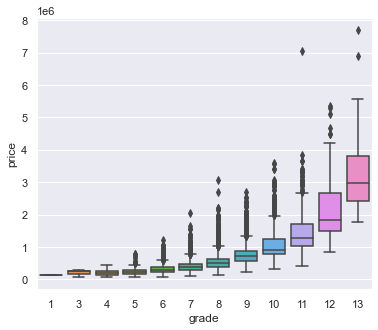

In [278]:
sns.boxplot(data=df,x="grade",y="price")
sns.set(rc={'figure.figsize':(6,5)})

# Préparation des données

In [328]:
df["date"] = pd.to_datetime(df["date"])
df["renovation"] = df["date"].dt.year - df['yr_built']
df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
df["date"] = (df["date"] - df["date"].min()).dt.days
df["ln_price"] = np.log(df["price"])
df["ln_sqft_living"] = np.log1p(df["sqft_living"])
df["ln_sqft_living15"] = np.log1p(df["sqft_living15"])
df["ln_sqft_lot"] = np.log1p(df["sqft_lot"])
df["ln_sqft_lot15"] = np.log1p(df["sqft_lot15"])
df["ln_sqft_basement"] = np.log1p(df["sqft_basement"])
df = df[df["bedrooms"] <= 20]

C:\Users\boure\AppData\Local\Temp/ipykernel_2872/2485446587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]


In [329]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,renovation,ln_price,ln_sqft_living,ln_sqft_living15,ln_sqft_lot,ln_sqft_lot15,ln_sqft_basement
count,2.161200e+04,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,180.198917,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,...,-122.213891,1986.582871,12768.828984,40.935730,13.047802,7.550918,7.540016,8.990147,8.961179,2.529115
std,2.876594e+09,113.047367,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,...,0.140829,685.392610,27304.756179,28.813764,0.526692,0.424570,0.327337,0.902306,0.812938,3.170589
min,1.000102e+06,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,-122.519000,399.000000,651.000000,-1.000000,11.225243,5.673323,5.991465,6.255750,6.480045,0.000000
25%,2.123049e+09,81.000000,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,...,-122.328000,1490.000000,5100.000000,15.000000,12.681802,7.263680,7.307202,8.525360,8.537192,0.000000
50%,3.904930e+09,167.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,...,-122.230000,1840.000000,7620.000000,37.000000,13.017003,7.555382,7.518064,8.938532,8.938663,0.000000
75%,7.308900e+09,291.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,...,-122.125000,2360.000000,10083.250000,60.000000,13.377006,7.844241,7.766841,9.276994,9.218730,6.329721
max,9.900000e+09,390.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,-121.315000,6210.000000,871200.000000,115.000000,15.856731,9.513477,8.734077,14.317110,13.677628,8.480737


In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,ElasticNet, Ridge, Lasso

In [330]:
X = df.drop(["price","ln_price","sqft_living","sqft_lot","sqft_living15","sqft_lot15","sqft_basement","id", "yr_renovated","yr_built"], axis=1)
y = df["ln_price"]
scaler = StandardScaler()

In [331]:
selector = RFECV(LinearRegression(), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
selector.cv_results_

{'mean_test_score': array([0.55286046, 0.64956882, 0.66879003, 0.67729522, 0.72220335,
        0.73459389, 0.74420937, 0.74510342, 0.74563247, 0.74571153,
        0.74633635, 0.74673358, 0.75459267, 0.75770414, 0.75949272,
        0.76085267, 0.76427225]),
 'std_test_score': array([0.15873442, 0.01272352, 0.00774846, 0.00786811, 0.01104344,
        0.0085411 , 0.00833252, 0.00789256, 0.00772932, 0.00760153,
        0.00763722, 0.00781185, 0.00974179, 0.00594387, 0.00584857,
        0.00516353, 0.00549812]),
 'split0_test_score': array([0.63120099, 0.65559798, 0.68001019, 0.68774553, 0.72504505,
        0.73750103, 0.74654902, 0.7470528 , 0.74737484, 0.74801749,
        0.74849697, 0.74876908, 0.76173936, 0.76193682, 0.76434007,
        0.76486504, 0.76812063]),
 'split1_test_score': array([0.61693503, 0.63378305, 0.65987532, 0.66599768, 0.71026572,
        0.72449879, 0.73543096, 0.73697714, 0.73807548, 0.73790096,
        0.73835655, 0.73863616, 0.73846805, 0.75317153, 0.75574014,
   

# Modéles de regression linéaire


In [283]:
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from scipy.linalg import LinAlgWarning

warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))


param_ridge = {"alpha": np.arange(10, 100, 1)}
param_lasso = {"alpha": np.arange(0.00025, 0.0025, 0.0005)}
grid_lasso = GridSearchCV(Lasso(), param_lasso, cv=5) #détermination du meilleur hyperparamètre alpha de Lasso
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=5) #détermination du meilleur hyperparamètre alpha de Ridge
grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
print( f"Lasso : {grid_lasso.best_params_}, Ridge : {grid_ridge.best_params_}")

Lasso : {'alpha': 0.00025} Ridge : {'alpha': 35}


In [334]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.7796065124061882

In [323]:
reg = ElasticNet().fit(X_train,y_train)
reg.score(X_test,y_test)

0.21004069287384985

In [333]:
reg = Ridge(alpha=35).fit(X_train,y_train)
reg.score(X_test,y_test)

0.7796228467892907

In [335]:
reg = Lasso(alpha=0.00025).fit(X_train,y_train)
reg.score(X_test,y_test)

0.7795870105326699